<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Detection-of-outliers" data-toc-modified-id="Detection-of-outliers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Detection of outliers</a></span><ul class="toc-item"><li><span><a href="#Creation-of-response-variable" data-toc-modified-id="Creation-of-response-variable-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creation of response variable</a></span></li></ul></li><li><span><a href="#Drop-columns-with-missing-values" data-toc-modified-id="Drop-columns-with-missing-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Drop columns with missing values</a></span></li></ul></div>

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
data = pd.read_csv('../data/02_output/01_DataToPreProc.csv', sep=',', index_col = ['Unnamed: 0'])
data['City'] = data['City'].str.strip()
print(data.shape,data.columns.values)
data

(369, 92) ['Country Code' 'Country Name' 'City' 'CDP_id' 'CDP_Date_measure'
 'CDP_Latitude' 'CDP_Longitude' 'CDP_Altitude' 'CDP_GDP' 'CDP_Land_Area'
 'CDP_Population' 'CDP_Temperature' 'CDP_EmissionsScope1'
 'CDP_EmissionsScope2' 'CDP_EmissionsScope3' 'CDP_TotalEmissions'
 'CDP_Total+Emissions' 'CDP_Gas_CH4' 'CDP_Gas_CO2' 'CDP_Gas_N20'
 'CDP_Gas_HFCs' 'CDP_Gas_NF3' 'CDP_Gas_PFCs' 'CDP_Gas_SF6' 'OWID_co2'
 'OWID_co2_growth_prct' 'OWID_co2_growth_abs' 'OWID_consumption_co2'
 'OWID_trade_co2' 'OWID_trade_co2_share' 'OWID_co2_per_capita'
 'OWID_consumption_co2_per_capita' 'OWID_share_global_co2'
 'OWID_cumulative_co2' 'OWID_share_global_cumulative_co2'
 'OWID_co2_per_gdp' 'OWID_consumption_co2_per_gdp'
 'OWID_co2_per_unit_energy' 'OWID_cement_co2' 'OWID_coal_co2'
 'OWID_flaring_co2' 'OWID_gas_co2' 'OWID_oil_co2'
 'OWID_other_industry_co2' 'OWID_cement_co2_per_capita'
 'OWID_coal_co2_per_capita' 'OWID_flaring_co2_per_capita'
 'OWID_gas_co2_per_capita' 'OWID_oil_co2_per_capita'
 'OWID_other_

,Country Code,Country Name,City,CDP_id,CDP_Date_measure,CDP_Latitude,CDP_Longitude,CDP_Altitude,CDP_GDP,CDP_Land_Area,...,GDP_Fiscal Health,GDP_Business Freedom,GDP_Labor Freedom,GDP_Monetary Freedom,GDP_Trade Freedom,GDP_Investment Freedom,GDP_Financial Freedom,HDI_HDI,CDP_inconsistent,CDP_pct_change2
0,ALB,Albania,Tirana,59163,2011.000,41.328,19.819,110.000,nan,1110.000,...,51.500,79.300,50.700,81.400,87.700,70.000,70.000,0.790,0.000,0.000
1,ARG,Argentina,Buenos Aires,31155,2013.571,-34.604,-58.382,25.000,39217081756.500,202.000,...,47.333,56.100,45.114,55.200,68.529,41.429,41.429,0.839,0.000,0.078
2,ARG,Argentina,Cordoba,50371,2014.667,-31.420,-64.189,390.000,12302882987.000,576.000,...,47.333,56.633,45.433,54.133,69.000,53.333,56.667,0.843,0.000,-0.019
3,ARG,Argentina,General Alvear Buenos Aires,69834,2014.000,-34.978,-67.695,nan,nan,nan,...,52.600,56.200,43.300,51.300,70.300,55.000,60.000,0.842,0.000,0.000
4,ARG,Argentina,Mendoza,50357,2015.000,-32.889,-68.846,nan,nan,nan,...,52.600,56.200,43.300,51.300,70.300,55.000,60.000,0.842,0.000,0.000
5,ARG,Argentina,Rio Grande,60419,2015.000,-53.786,-67.700,18.000,35124.000,938.000,...,41.675,57.525,45.700,54.025,69.050,53.750,57.500,0.843,0.000,0.000
6,AUS,Australia,Adelaide,32480,2015.333,-34.928,138.601,38.000,18242000000.000,16.000,...,84.450,89.267,80.333,86.333,86.267,80.000,90.000,0.941,0.000,0.039
7,AUS,Australia,Byron Shire,58543,2016.000,-28.653,153.533,nan,1460000000.000,556.000,...,84.600,89.300,84.100,86.400,86.200,80.000,90.000,0.941,0.000,0.000
8,AUS,Australia,Canberra,43928,2015.000,-35.307,149.124,578.000,35545500000.000,2358.000,...,84.600,90.933,80.967,85.633,86.333,80.000,90.000,0.939,0.000,0.006
9,AUS,Australia,Hobart,53254,2015.000,-42.890,147.281,9.000,nan,7791.000,...,84.450,89.200,81.900,86.900,86.200,80.000,90.000,0.942,0.000,0.257


## Detection of outliers

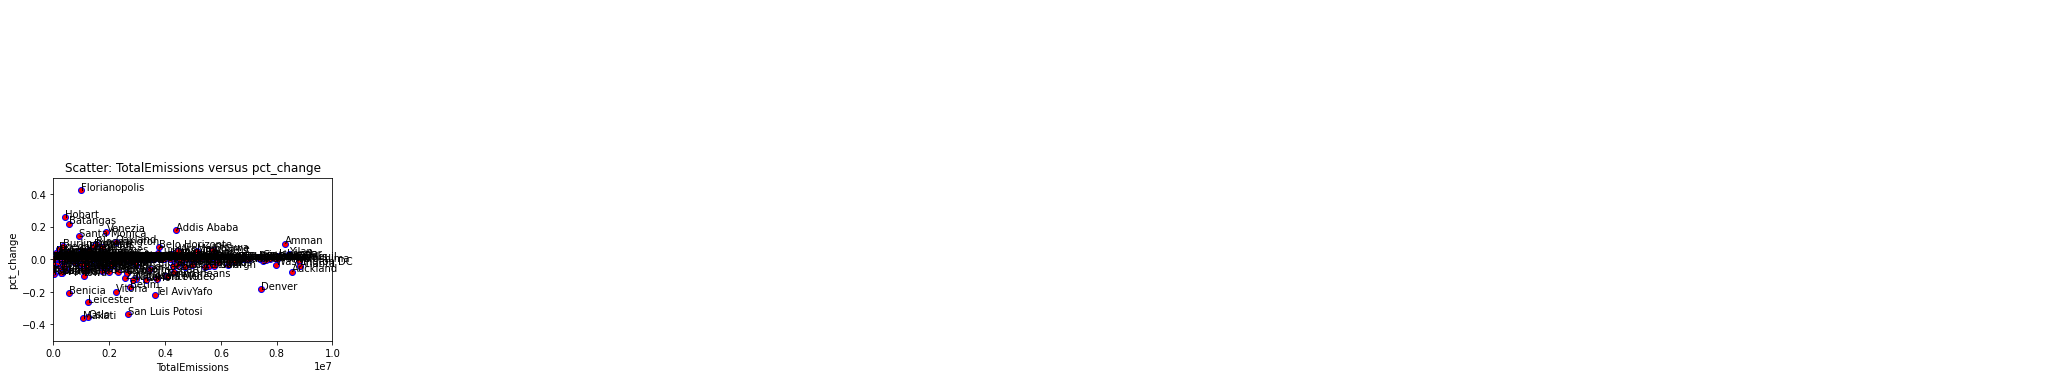

In [5]:
#%matplotlib inline
fig2, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data['CDP_TotalEmissions'], 
            y=data['CDP_pct_change2'], 
            marker='o', c='r', edgecolor='b')
ax.set_title('Scatter: TotalEmissions versus pct_change')
ax.set_xlabel('TotalEmissions')
ax.set_ylabel('pct_change')
ax.set_xlim(xmin=0, xmax=10000000)
ax.set_ylim(ymin=-0.5, ymax=0.5)

for i, txt in enumerate(data['City']):
    ax.annotate(txt, (data['CDP_TotalEmissions'][i], data['CDP_pct_change2'][i]))



### Creation of response variable

In [6]:
data['Emission_Population'] = data['CDP_TotalEmissions']/data['CDP_Population']

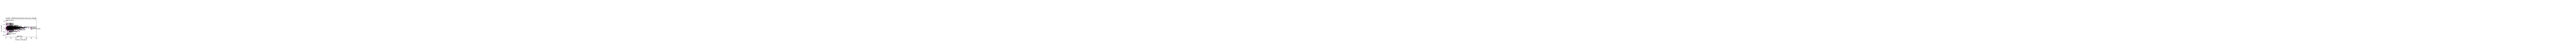

In [7]:
#%matplotlib inline
fig2, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data['Emission_Population'], 
            y=data['CDP_pct_change2'], 
            marker='o', c='r', edgecolor='b')
ax.set_title('Scatter: TotalEmissions/Pop versus pct_change')
ax.set_xlabel('Emission / Population')
ax.set_ylabel('pct_change')
ax.set_xlim(xmin=0, xmax=60)
ax.set_ylim(ymin=-0.5, ymax=0.5)

for i, txt in enumerate(data['City']):
    ax.annotate(txt, (data['Emission_Population'][i], data['CDP_pct_change2'][i]))


1-Binary classification  

Cities with a percentage change greater than 0 (reduction in emissions) or a number of emissions/population < 5

In [14]:
data['Classif'] = np.where((data['Emission_Population'] < 5) | 
                                   (data['CDP_pct_change2'] > 0), 1, 0)
data['Classif'].value_counts()

1    193
0    176
Name: Classif, dtype: int64

(-0.5, 0.5)

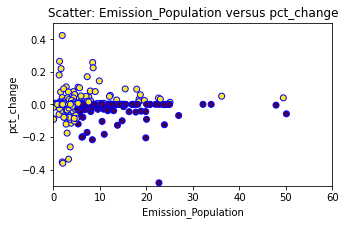

In [18]:
#%matplotlib inline
fig3, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data['Emission_Population'], 
            y=data['CDP_pct_change2'], 
            marker='o', c=data['Classif'], edgecolor='b')
ax.set_title('Scatter: Emission_Population versus pct_change')
ax.set_xlabel('Emission_Population')
ax.set_ylabel('pct_change')
ax.set_xlim(xmin=0, xmax=60)
ax.set_ylim(ymin=-0.5, ymax=0.5)

2-Multiple categories for classification  




In [22]:
data['CategClassif'] = np.where((data['CDP_inconsistent'] > 0) |
                                        (data['Emission_Population'] > 60), 1, 
                                        np.where((data['Emission_Population'] < 5) & 
                                            (data['CDP_pct_change2'] > 0), 2, 
                                       np.where(((data['Emission_Population'] > 5) & 
                                                 (data['Emission_Population'] < 30)) &
                                   ((data['CDP_pct_change2'] > -0.1) & (data['CDP_pct_change2'] < 0.1)), 3,
                                       np.where(((data['Emission_Population'] > 30) & 
                                                 (data['Emission_Population'] < 60)) & 
                                   (data['CDP_pct_change2'] < 0), 4, 
                                               5))))
data['CategClassif'].value_counts()

3    170
5    146
2     32
1     19
4      2
Name: CategClassif, dtype: int64

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/pamelainostroza/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/pamelainostroza/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:652: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


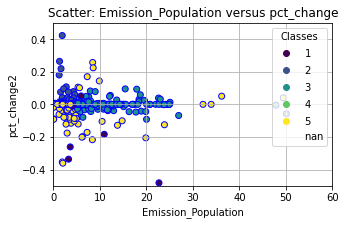

In [33]:
#%matplotlib inline
fig3, ax = plt.subplots(figsize=(5, 3))
scatter = ax.scatter(x=data['Emission_Population'], 
            y=data['CDP_pct_change2'], 
            marker='o', c=data['CategClassif'], edgecolor='b')
ax.set_title('Scatter: Emission_Population versus pct_change')
ax.set_xlabel('Emission_Population')
ax.set_ylabel('pct_change2')
ax.set_xlim(xmin=0, xmax=60)
ax.set_ylim(ymin=-0.5, ymax=0.5)
ax.grid(True)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
#ax.add_artist(legend1)

plt.show()

## Drop columns with missing values

In [35]:
missings = data.isna().sum()/len(data)
missings = missings.reset_index(name="n")

missings[missings['n'] < 0.5]

,index,n
0,Country Code,0.000
1,Country Name,0.000
2,City,0.000
3,CDP_id,0.000
4,CDP_Date_measure,0.003
5,CDP_Latitude,0.084
6,CDP_Longitude,0.084
7,CDP_Altitude,0.363
8,CDP_GDP,0.466
9,CDP_Land_Area,0.222


In [37]:
data.to_csv('../data/02_output/02_DataToModel.csv')